# Project 1 Code
### Serena Tang, Liwen, Winston

#### Getting familiar with the dataset

In [1]:
import pandas as pd
df = pd.read_csv('Project1-Classification.csv')
df.shape

(3150, 8)

Text(0, 0.5, 'Frequency')

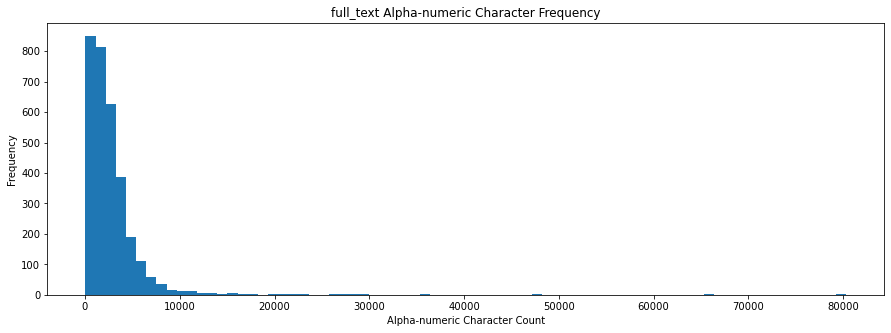

In [2]:
# counting alpha-numeric characters in full_text
import re
import matplotlib.pyplot as plt
full_text=df.full_text
full_text_count = []
for text in full_text:
    text = text.replace('\n','')
    text = re.sub(r'[^a-zA-Z0-9]','',text)
    full_text_count.append(len(text))
    
# plot frequency     
plt.rcParams['figure.figsize'] = (15, 5)
plt.hist(full_text_count,bins = 75)
plt.title('full_text Alpha-numeric Character Frequency')
plt.xlabel('Alpha-numeric Character Count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

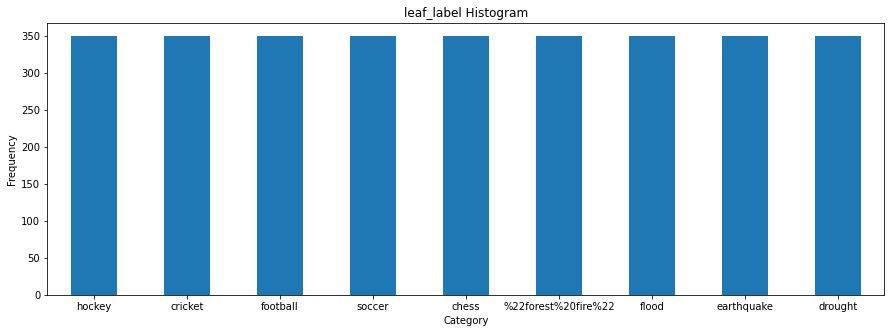

In [3]:
# histogram of leaf_label
df['leaf_label'].value_counts().plot(kind = 'bar',rot = 0)
plt.title('leaf_label Histogram')
plt.xlabel('Category')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

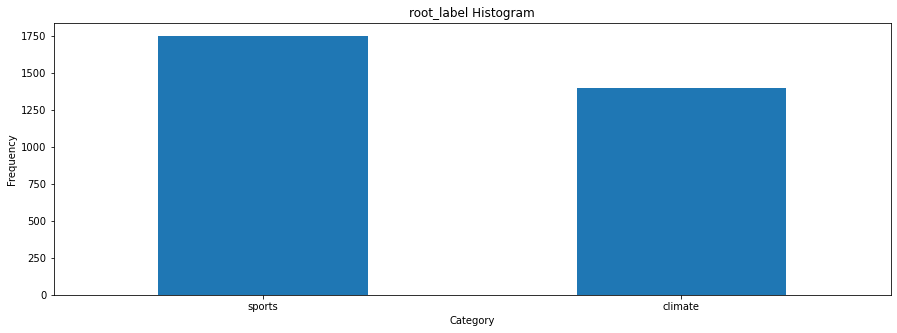

In [4]:
# histogram of root_label
df['root_label'].value_counts().plot(kind ='bar',rot = 0)
plt.title('root_label Histogram')
plt.xlabel('Category')
plt.ylabel('Frequency')

#### Binary Classification

In [5]:
import numpy as np
import random
np.random.seed(42)
random.seed(42)

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label"]], test_size = 0.2)
print(train.shape)
print(test.shape)

(2520, 2)
(630, 2)


In [7]:
import re
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [8]:
# clean text and remove numbers and punctuation
import string
table = str.maketrans(dict.fromkeys(string.punctuation))

for i in list(train.index):
    train.full_text[i] = clean(train.full_text[i])
    train.full_text[i] = re.sub(r'\S*\d\S*','',train.full_text[i])
    train.full_text[i] = train.full_text[i].translate(table)
    train.full_text[i] = train.full_text[i].lower()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
import nltk

wnl = WordNetLemmatizer()

# get pos of word
def get_pos(tag):
    pos_dict = {'JJ':'a', 'NN':'n', 'RB':'r', 'VB':'v'}
    if tag[1][:2] in list(pos_dict.keys()):
        return pos_dict[tag[1][:2]]
    else:
        return 'n'
    
# lemmatize text
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    tags = pos_tag(tokens)
    return  [wnl.lemmatize(pair[0],get_pos(pair)) for pair in tags]

tf_vectorizer = CountVectorizer(min_df = 3, stop_words='english', analyzer = lemmatize_text)

In [10]:
train_vectorized = tf_vectorizer.fit_transform(train.full_text)
print(train_vectorized.shape)
test_vectorized = tf_vectorizer.transform(test.full_text)
print(test_vectorized.shape)

(2520, 14465)
(630, 14465)
